## 2011交警服务平台

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
path='./data/cumcm2011B附件2_全市六区交通网路和平台设置的数据表.xls'

In [3]:
node_src=pd.read_excel(path,sheet_name=0)
node=node_src[node_src['路口所属区域']=='A'].iloc[:,1:3]
node

,路口的横坐标X,路口的纵坐标Y
0,413.0,359.0
1,403.0,343.0
2,383.5,351.0
3,381.0,377.5
4,339.0,376.0
...,...,...
87,444.5,383.0
88,441.0,385.0
89,440.5,381.5
90,445.0,380.0


In [4]:
edge=pd.read_excel(path,sheet_name=1)
A_edge_bool=(edge['路线起点(节点）标号']<=92) & (edge['路线终点（节点）标号']<=92)
edge=edge[A_edge_bool].iloc[:,0:2]
edge


,路线起点(节点）标号,路线终点（节点）标号
0,1,75
1,1,78
2,2,44
3,3,45
4,3,65
...,...,...
138,89,20
139,89,84
140,89,90
141,90,91


构建图

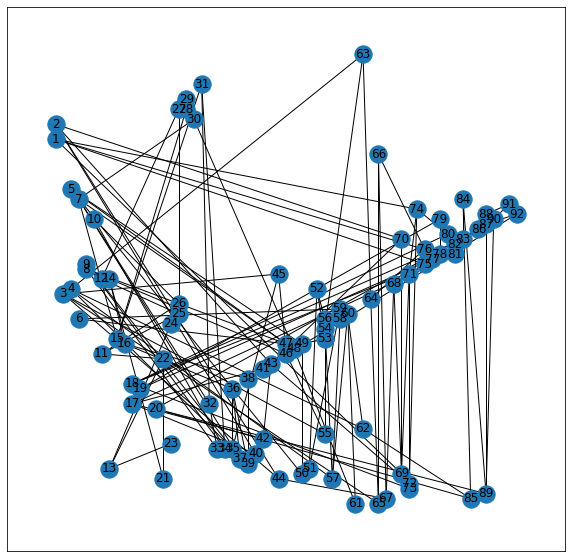

In [5]:
G=nx.Graph()

for i in range(92):
    G.add_node(i+1,pos=edge.values.tolist()[i])
# G.add_nodes_from(range(1,93),pos=node.values.tolist())
for i in range(len(edge.values.tolist())):
    G.add_edge(edge.values.tolist()[i][0],edge.values.tolist()[i][1])


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G,pos,ax=ax)
ax.axis('on')
plt.show()

问题一第一小问

In [6]:
def min_length(min_path):
    min_l=0
    for i in range(1,len(min_path)):
        # print(min_path[i-1])
        # print(node.iloc[min_path[i-1]-1,0],node.iloc[min_path[i]-1,0])
        # print(node.iloc[min_path[i-1]-1,1],node.iloc[min_path[i]-1,1])
        min_l=min_l+np.power(np.power(node.iloc[min_path[i-1]-1,0]-node.iloc[min_path[i]-1,0],2)+np.power(node.iloc[min_path[i-1]-1,1]-node.iloc[min_path[i]-1,1],2),0.5)
    return min_l   

In [7]:
min_path=nx.shortest_path(G, source=1, target=18)
print(min_path)
min_length(min_path)

[1, 74, 73, 18]


30.01919384053613

In [8]:
area={}
for i in range(21,93):
    area[str(i)]=0
    min_l=10000000
    for j in range(1,21):
        min_path=nx.shortest_path(G, source=i, target=j)#i到j交警平台的路径
        l=min_length(min_path)#最短距离
        if(min_l>=l):#当前交警平台更近
            area[str(i)]=(j,l)
            min_l=l

# for key in area:
#     # print(area[str(key)])
#     if(area[str(key)][0]==5):
#         print(key,area[str(key)])

for key in area:
    print(key,area[key])


21 (13, 27.083141515457363)
22 (13, 9.055385138137417)
23 (13, 5.0)
24 (13, 23.853720883753127)
25 (12, 17.88854381999832)
26 (11, 9.0)
27 (11, 16.433034373659254)
28 (15, 47.51841748206689)
29 (15, 57.00525046257202)
30 (7, 5.830951894845301)
31 (9, 20.55716237756951)
32 (7, 11.40175425099138)
33 (8, 8.276472678623424)
34 (9, 5.024937810560445)
35 (9, 4.242640687119285)
36 (16, 6.082762530298219)
37 (16, 11.181782043891005)
38 (16, 34.058772731852805)
39 (2, 36.82185924874034)
40 (2, 19.144189719076646)
41 (17, 8.5)
42 (17, 9.848857801796104)
43 (2, 8.0)
44 (2, 9.486832980505138)
45 (9, 10.950844619618653)
46 (8, 9.300537618869138)
47 (7, 12.806248474865697)
48 (7, 23.004287502051266)
49 (5, 5.0)
50 (5, 8.48528137423857)
51 (5, 12.293167927170524)
52 (5, 16.594330560691837)
53 (5, 11.70820393249937)
54 (3, 22.708864522293055)
55 (3, 12.658988901172163)
56 (5, 24.494848364936185)
57 (4, 18.681541692269406)
58 (5, 23.018893550499826)
59 (6, 16.0312195418814)
60 (4, 26.82095199031926)
61

问题一第二小问
分为两步，首先求13条路口中最长路线的最短情况  
然后锁定最长的路线，让其他的路线总和尽可能的最短

In [9]:
#A区的出入口
doors=[12,14,16,21,22,23,24,28,29,30,38,48,62]

#先把每个交警平台到每个出入口的长度求出来
door_to_police={}
for door in doors:
    oneDoor_to_police=[]
    for j in range(20):#20个交警平台
        min_path=nx.shortest_path(G, source=door, target=j+1)#i到j交警平台的路径
        l=min_length(min_path)#最短距离
        oneDoor_to_police.append(l)
    door_to_police[str(door)]=oneDoor_to_police

for key in door_to_police:
    print(key,door_to_police[key])

12 [227.8685470765543, 262.58375261831753, 183.5226848531524, 271.371651097502, 176.2819109832809, 176.58775995203837, 208.4798461181945, 140.92505686163443, 130.10714901836064, 75.865852138889, 37.91352821449911, 0, 59.77002108107139, 121.28650547499171, 170.29607993412094, 188.7031206377244, 271.33994222428066, 318.2725168790176, 232.06732759688745, 339.36045140499624]
14 [160.284737217503, 141.29724714332585, 127.6722728407034, 150.08514562251037, 136.37867811154155, 136.684527080299, 109.0122098581148, 94.33943188489341, 82.74201838015021, 127.75658928640087, 83.3729772604926, 121.28650547499171, 59.73279695008638, 0, 147.19597604218836, 67.4166151627327, 150.053436749289, 196.9860114040259, 213.9925410623236, 218.07394593000456]
16 [92.86812205477027, 73.88063198059314, 60.25565767797069, 82.66853045977766, 68.96206294880884, 69.26791191756631, 41.595594695382104, 26.922816722160704, 15.325403217417502, 69.56670009688918, 150.78959242322532, 188.70312063772442, 127.14941211281908,

找到到达最长路口的最短距离

In [10]:
import cvxpy as cp
#直接进行0-1规划，13*20个0或1，依次对应上面的距离
#限制条件则是所有和为13（满足13个平台出动）、每一行的和等于1，满足一个出口只派一个平台、每一列和也为1，保证每个平台只能去一个出口
#优化函数就是去13个出口的最长时间最短。
#创建问题

#创建01变量，就直接保持和上述求出来的距离结构一致,来存储01变量
var_decision={}#存储决策变量
for door in doors:
    oneDoor_to_police=[]
    for j in range(20):#20个交警平台
        oneDoor_to_police.append(cp.Variable(boolean=True))
    var_decision[str(door)]=oneDoor_to_police

#定义目标表达式
def object_function(var_decision,door_to_police):
    dist=[]
    for key in doors:
        dist.append(sum([x*y for x,y in zip(door_to_police[str(key)],var_decision[str(key)])]))
    
    return dist
obj = cp.Minimize(cp.max(cp.hstack(object_function(var_decision,door_to_police))))

#定义约束
constraints=[]
#一个路口只需要一个平台
def one_door_to_one_police(constraints,var_decision):
    for key in doors:
        constraints.append(sum(var_decision[str(key)]) >=1)
    return constraints

constraints=one_door_to_one_police(constraints,var_decision)
#一个平台只能去一个路口
def one_police_to_one_door(constraints,var_decision):
    for i in range(20):
        sum=0
        for key in doors:
            sum=sum+var_decision[str(key)][i]
        constraints.append(sum <=1)
    return constraints
constraints=one_police_to_one_door(constraints,var_decision)

# 定义问题
prob = cp.Problem(obj, constraints)

# 求解问题
prob.solve(solver=cp.CPLEX)

print("status:", prob.status)
print("optimal value", prob.value)

for door in doors:
    for j in range(20):#20个交警平台
        if(var_decision[str(door)][j].value==1):
            print(door,"  ",j+1,'  ',door_to_police[str(door)][j])

status: optimal
optimal value 80.15456859909348
12    10    75.865852138889
14    16    67.4166151627327
16    3    60.25565767797069
21    11    50.72332182586358
22    14    50.677411811948964
23    12    64.77002108107139
24    13    23.853720883753127
28    15    47.51841748206689
29    7    80.15456859909348
30    8    39.43383471279642
38    2    39.82185924874034
48    6    25.064107774504073
62    4    3.5


将到达最长路口的最短距离定好，然后去看第二优化目标，总时间最短  
这个地方的代码和上面的一样，只不过多加一条限制条件，就是29号路口与7号平台直接绑定，然后求的是和的最小

In [15]:
import cvxpy as cp

var_decision={}#存储决策变量
for door in doors:
    oneDoor_to_police=[]
    for j in range(20):#20个交警平台
        oneDoor_to_police.append(cp.Variable(boolean=True))
    var_decision[str(door)]=oneDoor_to_police

#定义目标表达式
def object_function(var_decision,door_to_police):
    dist=[]
    for key in doors:
        dist.append(sum([x*y for x,y in zip(door_to_police[str(key)],var_decision[str(key)])]))
    
    return dist
obj = cp.Minimize(cp.sum(object_function(var_decision,door_to_police)))

#定义约束
constraints=[]
#一个路口只需要一个平台
def one_door_to_one_police(constraints,var_decision):
    for key in doors:
        constraints.append(sum(var_decision[str(key)]) >=1)
    return constraints

constraints=one_door_to_one_police(constraints,var_decision)
#一个平台只能去一个路口
def one_police_to_one_door(constraints,var_decision):
    for i in range(20):
        sum=0
        for key in doors:
            sum=sum+var_decision[str(key)][i]
        constraints.append(sum <=1)
    constraints.append(var_decision['29'][6]==1)#把最长的固定
    return constraints
constraints=one_police_to_one_door(constraints,var_decision)

# 定义问题
prob = cp.Problem(obj, constraints)

# 求解问题
prob.solve(solver=cp.CPLEX)

print("status:", prob.status)
print("optimal value", prob.value)

for door in doors:
    for j in range(20):#20个交警平台
        if(var_decision[str(door)][j].value==1):
            print(door,"  ",j+1,'  ',door_to_police[str(door)][j])


status: optimal
optimal value 464.77996531372867
12    12    0
14    16    67.4166151627327
16    9    15.325403217417502
21    14    32.64965543462902
22    10    77.0791774744519
23    13    5.0
24    11    38.05274077182074
28    15    47.51841748206689
29    7    80.15456859909348
30    5    33.19742014827203
38    2    39.82185924874034
48    6    25.064107774504073
62    4    3.5


问题一第三小问  
优化工作量不均和出警时间过长，添加2-5个平台

In [12]:
bad_rate=node_src[node_src['路口所属区域']=='A'].iloc[:,4]
bad_rate[:5]

0    1.7
1    2.1
2    2.2
3    1.7
4    2.1
Name: 发案率(次数), dtype: float64

In [13]:
# #首先得定义一个评价指标
# #出警最长时间，各出警时间*案发次数值和基本一致

# #如果还搞01规划的话，就是92个平台，除了确定的20个1，然后根据需要加上几个1
# #可以先提前计算一下其他点到20个平台的距离，加上几个后再更新一遍
# #area就是之前计算的各节点到平台的最短路径的距离


# new_node=1

# #创建92个01节点，1表示是平台，0表示不是平台
# var_all_node=[]
# for i in range(92):
#     var_all_node.append(cp.Variable(boolean=True))
# #01规划限制比较多，只能用数学表达式来对变量进行操作，所以在新加平台更新最短节点的时候不能用下面的if来判断
# #应该统一的通过数学表达式来计算得到
# #所以得把所有的节点对平台的最短路径求出来进行计算



# def update_dist(var_all_node,area):
#     for i in range(20,len(var_all_node)):
#         print(var_all_node[i]>=0)
#         if(var_all_node[i]==1):#找到新加的平台
#             for key in area:#看这个平台与其他节点是否更近，近就把这个节点分到新的平台上
#                 min_path=nx.shortest_path(G, source=i+1, target=key)
#                 l=min_length(min_path)
#                 if(l<=area[key]):#如果离新加的近
#                     area[key]=(i+1,l)#就直接分配上去
#     return area

# #计算出警的最长时间
# def max_time(area):
#     l_list=[]
#     for key in area:
#         l_list.append(area[key][1])
#     return cp.max(cp.hstack(l_list))

# #计算各平台出警时间的方差
# def sum_time(area,bad_rate):
#     return None

# #定义最小代价函数
# def object_fun(var_all_node,area):
#     #首先根据新的节点更新各节点到平台的最短距离
#     area=update_dist(var_all_node,area)
#     #根据更新的area计算最长的出警路程
#     max_time(area)

#     return None
# obj_2=cp.Minimize(object_fun(var_all_node,area))


# #定义约束List，首先前二十个节点都为1
# #全部相加等于20加新的节点数
# bounds=[]
# for i in range(len(var_all_node)):
#     if(i<20):
#         bounds.append(var_all_node[i]==1)
# bounds.append(sum(var_all_node)==20+new_node)

# # 定义问题
# prob_2 = cp.Problem(obj_2, bounds)

# # 求解问题
# prob_2.solve(solver=cp.CPLEX)

# print("status:", prob_2.status)
# print("optimal value", prob_2.value)

In [14]:
dist_matrix=[]#距离矩阵，提前计算好
for i in range(92):
    one=[]
    for j in range(92):
        min_path=nx.shortest_path(G, source=door, target=j+1)#i到j交警平台的路径
        l=min_length(min_path)#最短距离
        one.append(l)
    dist_matrix.append(one)


var_isPolice=[]#是否为平台的变量
for i in range(92):
    var_isPolice.append(cp.Variable(boolean=True))

var_Distribution=[]#第i个平台负责第j个节点
for i in range(92):
    oneNode=[]
    for j in range(92):
        oneNode.append(cp.Variable(boolean=True))
    var_Distribution.append(oneNode)


#工作量不均衡目标
def target_work_time():
    work_list=[]
    for i in range(92):
        work_time=0#第i个平台的工作量
        for j in range(92):
            work_time+=var_isPolice[i]*var_Distribution[i][j]*bad_rate[j]#是否平台*是否分配*工作量
        work_list.append(work_time)
    return np.std(work_list)#返回方差
#距离最短目标
# def target_minDis():


new_police=2

#约束条件
constraints_3=[]
#前20个已经是平台
for i in range(20):
    constraints_3.append(var_isPolice[i]==1)
#保证j路口有且仅分配到一个平台，且必须是分配到平台
for j in range(92):
    constraints_3.append()
#总共22个平台
constraints_3.append(cp.sum(var_isPolice)==20+new_police)




#i平台处理j节点
for i in range(92):
    